In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [5]:
df['headline_length'] = df['headline'].str.len()

df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [3]:
df['publisher'].value_counts()


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

<Axes: title={'center': 'Articles Published Per Day'}, xlabel='date_only'>

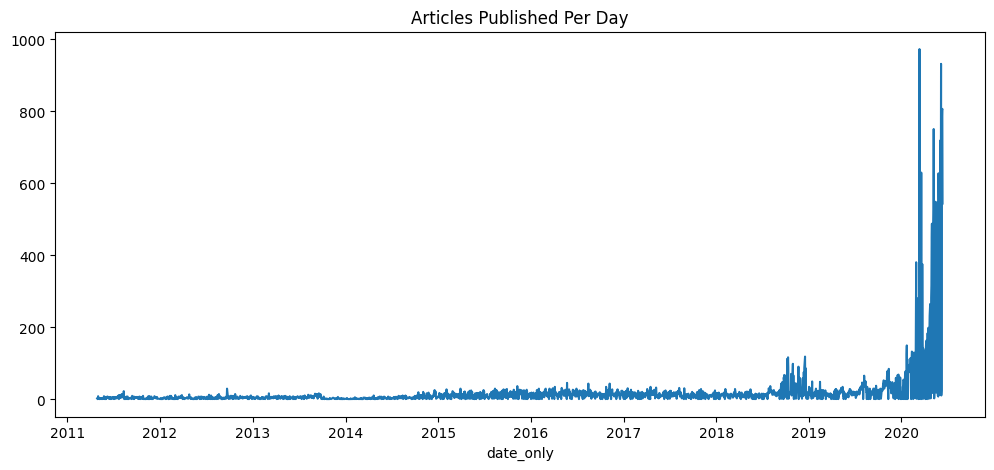

In [7]:
df['date_only'] = df['date'].dt.date

df.groupby('date_only').size().plot(
    figsize=(12,5),
    title="Articles Published Per Day"
)


<Axes: title={'center': 'Articles per Hour of Day'}, xlabel='hour'>

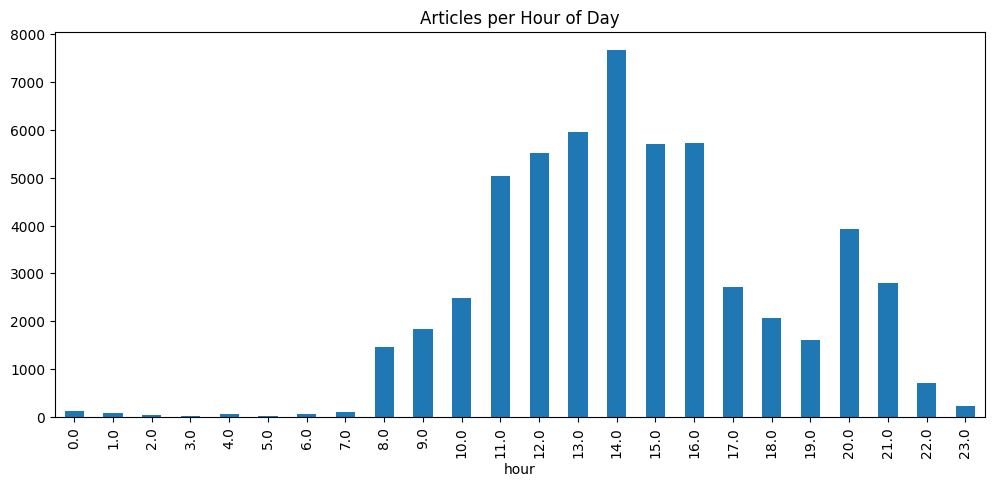

In [8]:
df['hour'] = df['date'].dt.hour

df.groupby('hour').size().plot(
    kind='bar',
    figsize=(12,5),
    title="Articles per Hour of Day"
)


In [9]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

words = " ".join(df['headline']).lower().split()
filtered_words = [w for w in words if w not in stop_words]

Counter(filtered_words).most_common(20)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blien\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('stocks', 159102),
 ('vs', 138801),
 ('eps', 127403),
 ('shares', 112655),
 ('reports', 108429),
 ('market', 89225),
 ('update:', 85354),
 ('earnings', 80855),
 ('top', 78354),
 ('sales', 77924),
 ('pt', 72733),
 ('announces', 66513),
 ('price', 63328),
 ('downgrades', 61862),
 ('trading', 60582),
 ('raises', 57735),
 ("benzinga's", 54882),
 ('target', 53530),
 ('maintains', 52958),
 ('52-week', 49801)]

In [10]:
df['domain'] = df['publisher'].str.extract(r'@(.+)$')
df['domain'].value_counts()


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64